## Determine Run-Tumble Labeling parameters 
The parameters for run-tumble labeling can significantly affect the results of the analysis. 

It is important to choose these parameters carefully based on the characteristics of the data and the biological context.

Here are the tools to help you choose the parameters. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from config import Config
from dataloader import DataLoader
from data_processor import DataProcessor

### 1. Find long tracks that may be representative 

In [3]:
config = Config(
    **{
        "threshold_nspots": 10,
        "labeling_method": "combined", # "angle" or "speed" or "combined"
        "threshold_angle": 50,  # degrees
        "threshold_speed": 1.5,  # units consistent with POSITION_X/Y and FRAME
        "min_size_cluster": 3,
        "combination_rule": "or",
        "preprocess_to_apply_default" : ["filter_nspots", "interpolate_missing_frames", "add_distance_to_next_point", "sort_by_track_and_frame", "compute_speed"]
    }
)
folder_path = Path("data/M9_100_0P28_2") 
dataloading = DataLoader(folder_path)
spot_df = dataloading.load_spot_data()
dp = DataProcessor(spot_df, config)

Filtering tracks with nspots < 10
 Starting spot_df size: 18473
 Filtered spot_df size: 15653
Interpolating missing frames
Interpolated 297 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
=== Experiment statistics ===
Number of tracks: 387.0
Number of tracks with more than 100 spots: 29.0
Number of spots: 15950.0
Mean speed: 20.21 µm/s


In [4]:
dp.label_tracks()

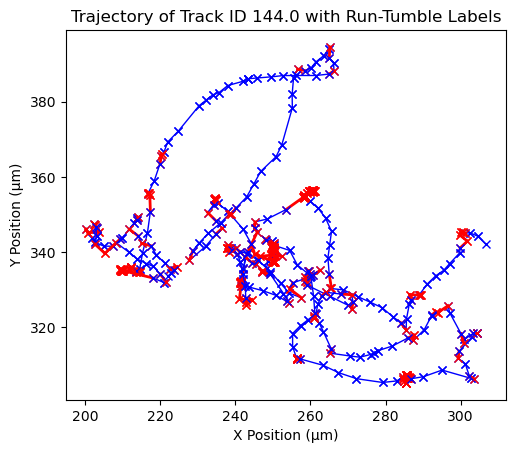

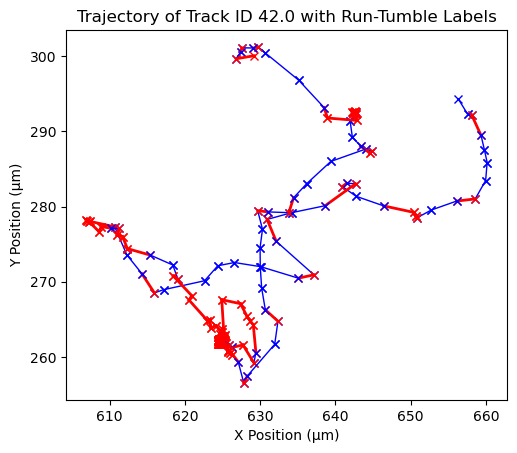

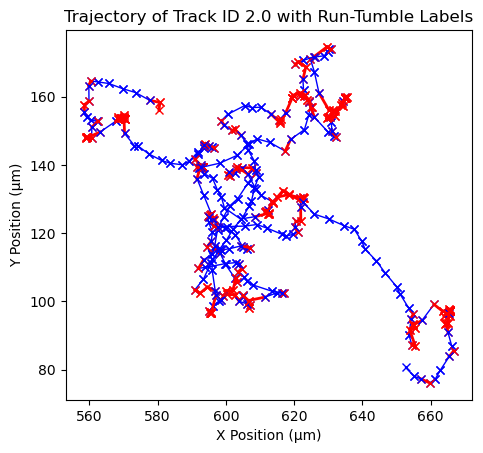

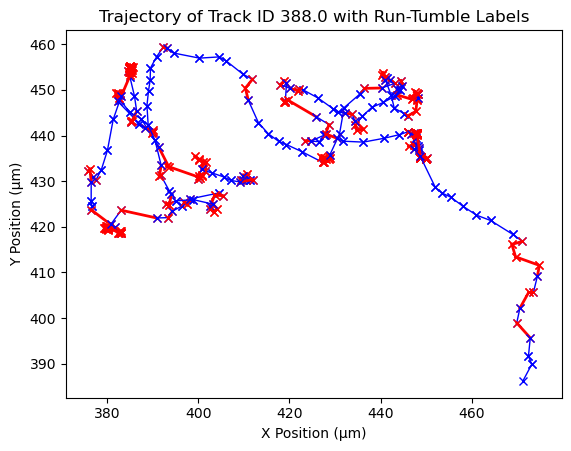

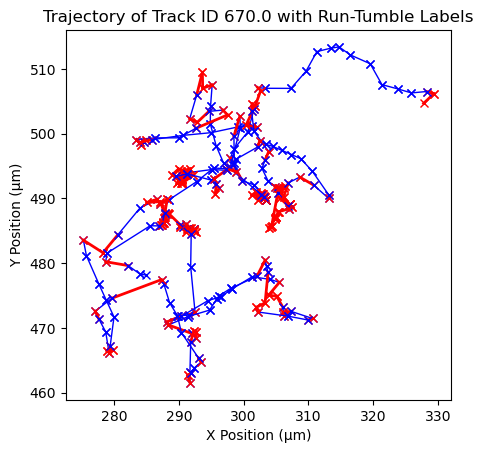

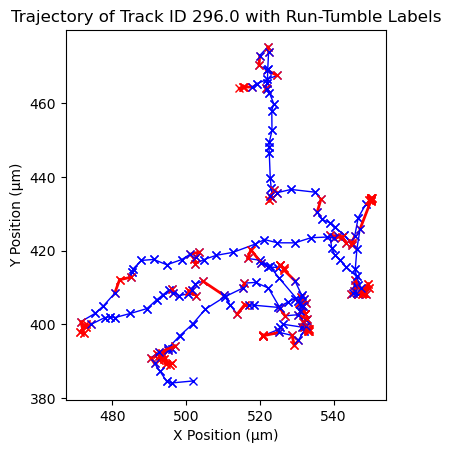

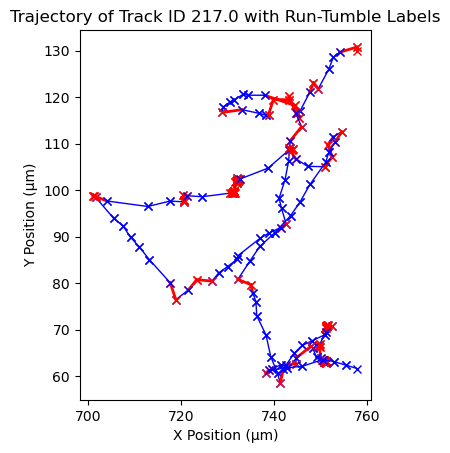

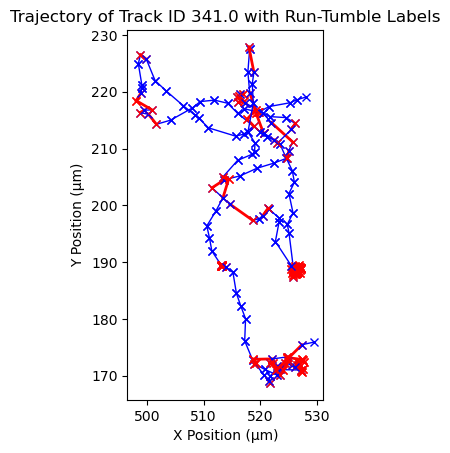

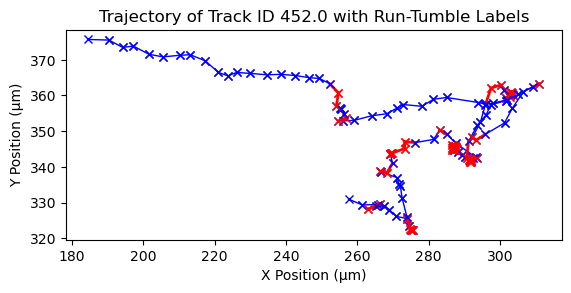

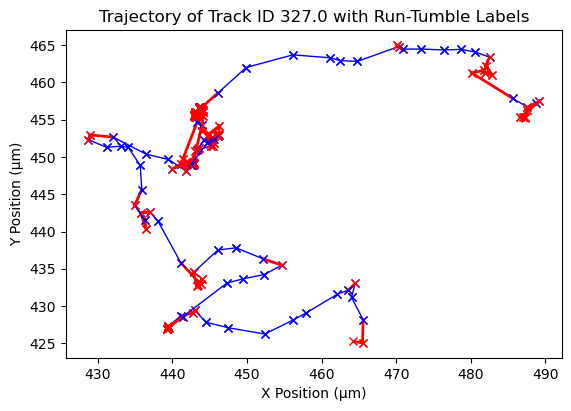

In [5]:
for track_id in dp.list_longest:
    dp.plotter.plot_run_tumble(track_id, real_distance=True)

### 2. For a chosen track, try different labeling parameters and visualize the results

In [6]:
config_angle = Config(
    **{
        "threshold_nspots": 10,
        "labeling_method": "angle", # "angle" or "speed" or "combined"
        "threshold_angle": 30,  # degrees
        "threshold_speed": 1.5,  # units consistent with POSITION_X/Y and FRAME
        "min_size_cluster": 3,
        "combination_rule": "or",
        "preprocess_to_apply_default" : ["filter_nspots", "interpolate_missing_frames", "add_distance_to_next_point", "sort_by_track_and_frame", "compute_speed"]
    }
)
config_speed = Config(
    **{
        "threshold_nspots": 10,
        "labeling_method": "speed", # "angle" or "speed" or "combined"
        "threshold_angle": 50,  # degrees
        "threshold_speed": 1.5,  # units consistent with POSITION_X/Y and FRAME
        "min_size_cluster": 3,
        "combination_rule": "or",
        "preprocess_to_apply_default" : ["filter_nspots", "interpolate_missing_frames", "add_distance_to_next_point", "sort_by_track_and_frame", "compute_speed"]
    }
)
config_combined = Config(
    **{
        "threshold_nspots": 10,
        "labeling_method": "combined", # "angle" or "speed" or "combined"
        "threshold_angle": 50,  # degrees
        "threshold_speed": 1,  # units consistent with POSITION_X/Y and FRAME
        "min_size_cluster": 3,
        "combination_rule": "or",
        "preprocess_to_apply_default" : ["filter_nspots", "interpolate_missing_frames", "add_distance_to_next_point", "sort_by_track_and_frame", "compute_speed"]
    }
)

Filtering tracks with nspots < 10
 Starting spot_df size: 18473
 Filtered spot_df size: 15653
Interpolating missing frames
Interpolated 297 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
=== Experiment statistics ===
Number of tracks: 387.0
Number of tracks with more than 100 spots: 29.0
Number of spots: 15950.0
Mean speed: 20.21 µm/s
Filtering tracks with nspots < 10
 Starting spot_df size: 18473
 Filtered spot_df size: 15653
Interpolating missing frames
Interpolated 297 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
=== Experiment statistics ===
Number of tracks: 387.0
Number of tracks with more than 100 spots: 29.0
Number of spots: 15950.0
Mean speed: 20.21 µm/s
Filtering tracks with nspots < 10
 Starting spot_df size: 18473
 Filtered spot_df size: 15653
Interpolating missing frames
Interpolated 297 missing frames across all tracks.
Adding distance to next po

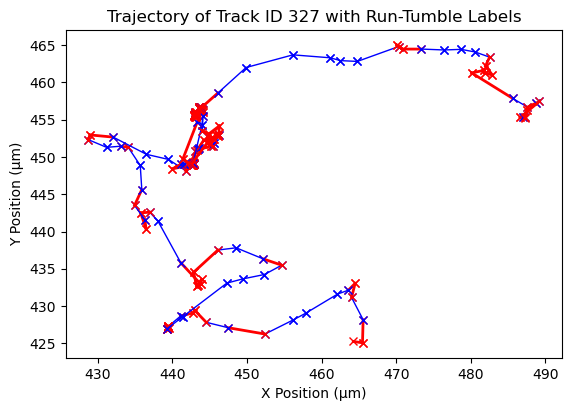

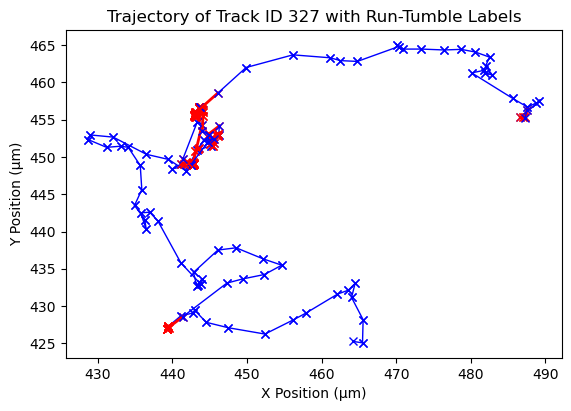

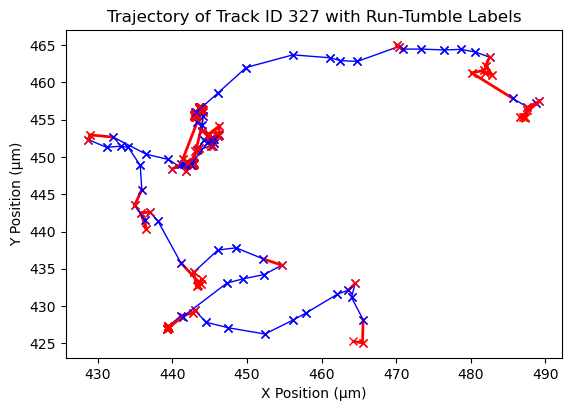

In [7]:
import matplotlib.pyplot as plt
selected_track_id = 327
dp_angle = DataProcessor(spot_df, config_angle)
dp_angle.label_tracks()

dp_speed = DataProcessor(spot_df, config_speed)
dp_speed.label_tracks()

dp_comb = DataProcessor(spot_df, config_combined)
dp_comb.label_tracks()

dp_angle.plotter.plot_run_tumble(selected_track_id, real_distance=True, show_plot=True)
dp_speed.plotter.plot_run_tumble(selected_track_id, real_distance=True, show_plot=True)
dp_comb.plotter.plot_run_tumble(selected_track_id, real_distance=True, show_plot=True)

# Export plots
# dp_angle.plotter.plot_run_tumble(selected_track_id, real_distance=True, show_plot=False)
# plt.savefig("images/angle_labeling_track_327.png", dpi=300)
# dp_speed.plotter.plot_run_tumble(selected_track_id, real_distance=True, show_plot=False)
# plt.savefig("images/speed_labeling_track_327.png", dpi=300)
# dp_comb.plotter.plot_run_tumble(selected_track_id, real_distance=True, show_plot=False)
# plt.savefig("images/combined_labeling_track_327.png", dpi=300)